In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]
np.random.seed(42)

## q2a or 1

Calculating probabilities...
Done!
modal number of moves: 30


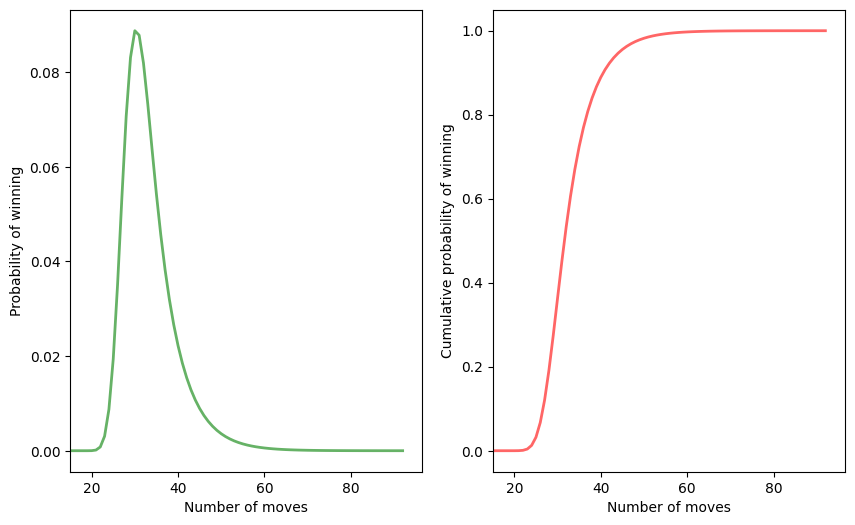

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Set up the transition matrix
T = np.zeros((101, 101))
for i in range(1,101):
    T[i-1,i:i+6] = 1/6

for i in range(1, 6):
    T[94 + i][94 + i] = i/6

# The player starts at position 0.
v = np.zeros(101)
v[0] = 1

n, P, C = 0, [], []
cumulative_prob = 0
# Update the state vector v until the cumulative probability of winning
# is "effectively" 1
print('Calculating probabilities...')
while cumulative_prob < 0.99999:
    n += 1
    v = v.dot(T)
    P.append(v[100])
    cumulative_prob += P[-1]
    C.append(cumulative_prob)
print('Done!')

mode = np.argmax(P)+1
print('modal number of moves:', mode)

# Plot the probability of winning as a function of the number of moves
fig, ax = plt.subplots(1,2)
ax[0].plot(np.linspace(1,n,n), P, 'g', lw=2, alpha=0.6)
ax[0].set_xlim(15)
ax[0].set_xlabel('Number of moves')
ax[0].set_ylabel('Probability of winning')
ax[1].plot(np.linspace(1,n,n), C, 'r', lw=2, alpha=0.6)
ax[1].set_xlim(15)
ax[1].set_xlabel('Number of moves')
ax[1].set_ylabel('Cumulative probability of winning')


plt.show()

### The snakes and ladders are added as a list of tuples indicating which squares are joined. Note that the square on which a snake or ladder originates doesn't really need to be included in the transition matrix (since the player can never occupy these positions), but here we keep them for simplicity.


modal number of moves: 23


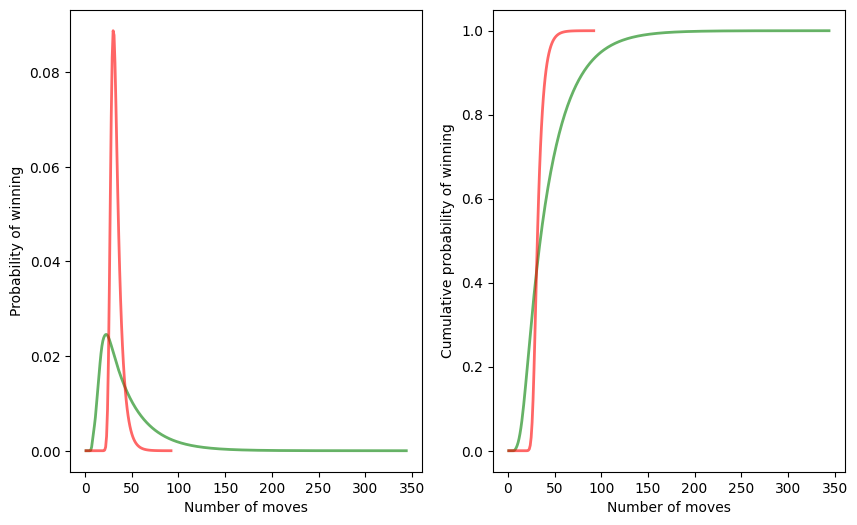

In [27]:
import numpy as np
import matplotlib.pyplot as plt

ladders = [(3,19), (15,37), (22,42), (25,64), (41,73),
           (53,74), (63,86), (76,91), (84,98)]
snakes = [(11,7), (18,13), (28,12), (36,34), (77,16),
          (47,26), (83,39), (92,75), (99,70)]
trans = ladders + snakes

# Set up the transition matrix
T = np.zeros((101, 101))
for i in range(1,101):
    T[i-1,i:i+6] = 1/6

for (i1,i2) in trans:
    iw = np.where(T[:,i1] > 0)
    T[:,i1] = 0
    T[iw,i2] += 1/6

for i in range(1, 6):
    T[94 + i][94 + i] = i/6

# The player starts at position 0.
v = np.zeros(101)
v[0] = 1

ns, Ps, Cs = 0, [], []
cumulative_prob = 0
# Update the state vector v until the cumulative probability of winning
# is "effectively" 1
while cumulative_prob < 0.99999:
    ns += 1
    v = v.dot(T)
    Ps.append(v[100])
    cumulative_prob += Ps[-1]
    Cs.append(cumulative_prob)
    
mode = np.argmax(Ps)+1
print('modal number of moves:', mode)

# Plot the probability of winning as a function of the number of moves
fig, ax = plt.subplots(1,2)
ax[0].plot(np.linspace(1,ns,ns), Ps, 'g-', lw=2, alpha=0.6, label='Markov')
ax[0].plot(np.linspace(1,n,n), P, 'r-', lw=2, alpha=0.6, label='No snakes or ladders')
ax[0].set_xlabel('Number of moves')
ax[0].set_ylabel('Probability of winning')
ax[1].plot(np.linspace(1,ns,ns), Cs, 'g-', lw=2, alpha=0.6, label='Markov')
ax[1].plot(np.linspace(1,n,n), C, 'r-', lw=2, alpha=0.6, label='No snakes or ladders')
ax[1].set_xlabel('Number of moves')
ax[1].set_ylabel('Cumulative probability of winning')

plt.show()

## q2b or 2, single player simulation

In [ ]:
trials = 10000

In [37]:
ladders = [(3,19), (15,37), (22,42), (25,64), (41,73),
           (53,74), (63,86), (76,91), (84,98)]
snakes = [(11,7), (18,13), (28,12), (36,34), (77,16),
          (47,26), (83,39), (92,75), (99,70)]
trans = dict(ladders + snakes)

def one_game(with_snakes_ladders):
    position = 0
    num_moves = 0
    while position < 100:
        num_moves += 1
        roll = np.random.randint(1, 7)
        position += roll
        if with_snakes_ladders and position > 100:
            position -= roll
        if position in trans:
            position = trans[position]
    return num_moves

def run_snake_ladder_trials(num_trials, with_snakes_ladders):
    num_rolls_per_trial = []
    for _ in range(num_trials):
        num_moves = one_game(with_snakes_ladders)
        num_rolls_per_trial.append(num_moves)
    return num_rolls_per_trial
        

In [30]:
without = run_snake_ladder_trials(trials, False)
with_ = run_snake_ladder_trials(trials, True)

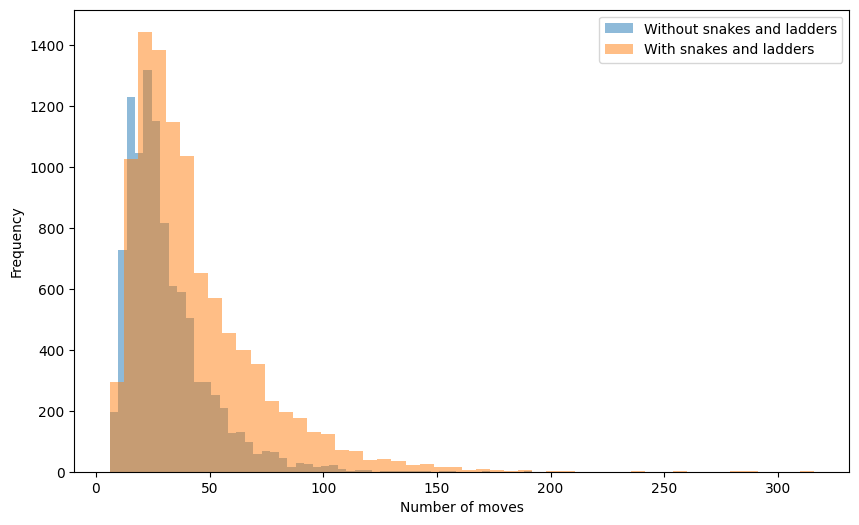

In [36]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(without, bins=50, alpha=0.5, label='Without snakes and ladders')
ax.hist(with_, bins=50, alpha=0.5, label='With snakes and ladders')
ax.set_xlabel('Number of moves')
ax.set_ylabel('Frequency')
ax.legend()

## q2c or 3, two player simulation

In [38]:
def two_player(num_trials, with_snakes_ladders):
    num_rolls_per_trial = []
    for _ in range(num_trials):
        first_game = one_game(with_snakes_ladders)
        second_game = one_game(with_snakes_ladders)
        num_rolls_per_trial.append(min(first_game, second_game))
    return num_rolls_per_trial

In [39]:
single_with = run_snake_ladder_trials(trials, True)
two_with = two_player(trials, True)
single_without = run_snake_ladder_trials(trials, False)
two_without = two_player(trials, False)

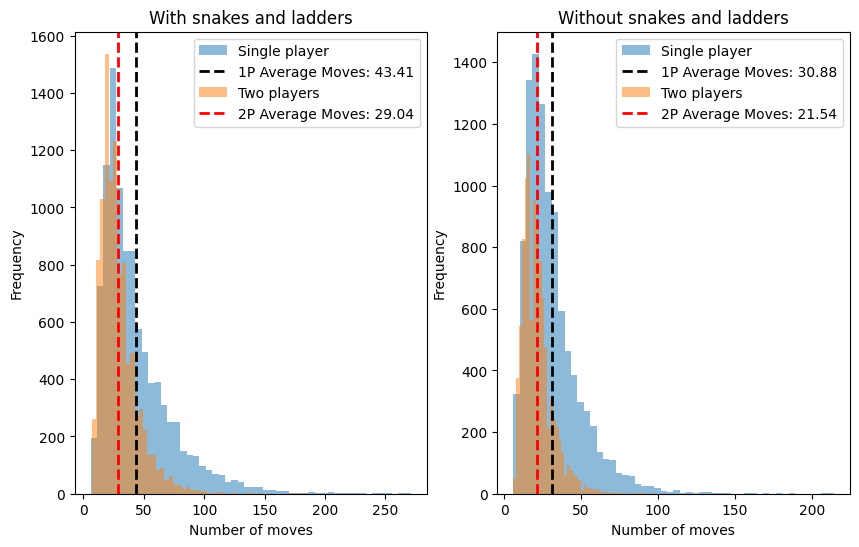

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].hist(single_with, bins=50, alpha=0.5, label='Single player')
avg_single_with = np.mean(single_with)
ax[0].axvline(avg_single_with, color='k', linestyle='dashed', linewidth=2, label=f'1P Average Moves: {avg_single_with:.2f}')
ax[0].hist(two_with, bins=50, alpha=0.5, label='Two players')
avg_two_with = np.mean(two_with)
ax[0].axvline(avg_two_with, color='r', linestyle='dashed', linewidth=2, label=f'2P Average Moves: {avg_two_with:.2f}')
ax[0].set_xlabel('Number of moves')
ax[0].set_ylabel('Frequency')
ax[0].title.set_text('With snakes and ladders')
ax[0].legend()

ax[1].hist(single_without, bins=50, alpha=0.5, label='Single player')
avg_single_without = np.mean(single_without)
ax[1].axvline(avg_single_without, color='k', linestyle='dashed', linewidth=2, label=f'1P Average Moves: {avg_single_without:.2f}')
ax[1].hist(two_without, bins=50, alpha=0.5, label='Two players')
avg_two_without = np.mean(two_without)
ax[1].axvline(avg_two_without, color='r', linestyle='dashed', linewidth=2, label=f'2P Average Moves: {avg_two_without:.2f}')
ax[1].set_xlabel('Number of moves')
ax[1].set_ylabel('Frequency')
ax[1].legend()
ax[1].title.set_text('Without snakes and ladders')

#### Response
We see that the two player game takes less moves to win a game. The idea behind this is that with two players, we are essentially playing 2 single player games and taking the best one. We are skewing our data to have the fastest game between two games.